In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import ISLP
from ISLP import load_data
%matplotlib inline

In [2]:
college=load_data('College')

In [3]:
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Private      777 non-null    category
 1   Apps         777 non-null    int64   
 2   Accept       777 non-null    int64   
 3   Enroll       777 non-null    int64   
 4   Top10perc    777 non-null    int64   
 5   Top25perc    777 non-null    int64   
 6   F.Undergrad  777 non-null    int64   
 7   P.Undergrad  777 non-null    int64   
 8   Outstate     777 non-null    int64   
 9   Room.Board   777 non-null    int64   
 10  Books        777 non-null    int64   
 11  Personal     777 non-null    int64   
 12  PhD          777 non-null    int64   
 13  Terminal     777 non-null    int64   
 14  S.F.Ratio    777 non-null    float64 
 15  perc.alumni  777 non-null    int64   
 16  Expend       777 non-null    int64   
 17  Grad.Rate    777 non-null    int64   
dtypes: category(1), float64(1), in

In [6]:
college.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [11]:
x=college[['Apps', 'Accept', 'Enroll','F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
    'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate']]

In [12]:
y=college['Top10perc']

In [13]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [20]:
x_trained=sm.add_constant(x_train)

In [21]:
x_tested=sm.add_constant(x_test)

In [22]:
model=sm.OLS(y_train,x_trained)

In [23]:
results=model.fit()

In [24]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Top10perc   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     58.25
Date:                Fri, 23 May 2025   Prob (F-statistic):          2.01e-101
Time:                        16:09:15   Log-Likelihood:                -2046.7
No. Observations:                 543   AIC:                             4125.
Df Residuals:                     527   BIC:                             4194.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -14.7674      4.610     -3.203      0.001     -23.823      -5.711
Apps            0.0038      0.000      7.901      0.000       0.003       0.005
Accept         -0.0074      0.001     -7.749      0.000      -0.009      -0.005
Enroll          0.0064      0.002      2.771      0.006       0.002       0.011
F.Undergrad     0.0004      0.000      0.931      0.352      -0.000       0.001
P.Undergrad    -0.0013      0.000     -2.697      0.007      -0.002      -0.000
Outstate        0.0008      0.000      3.624      0.000       0.000       0.001
Room.Board     -0.0012      0.001     -1.933      0.054      -0.002     1.9e-05
Books           0.0062      0.003      2.093      0.037       0.000       0.012
Personal       -0.0005      0.001     -0.614      0.539      -0.002       0.001
PhD             0.2852      0.057      5.018      0.000       0.174       0.397
Terminal       -0.0483      0.062     -0.783      0.434      -0.170       0.073
S.F.Ratio      -0.1824      0.152     -1.203      0.230      -0.480       0.116
perc.alumni     0.1521      0.051      2.957      0.003       0.051       0.253
Expend          0.0009      0.000      5.862      0.000       0.001       0.001
Grad.Rate       0.1316      0.035      3.734      0.000       0.062       0.201
==============================================================================
Omnibus:                       85.300   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.217
Skew:                           0.868   Prob(JB):                     2.00e-39
Kurtosis:                       5.206   Cond. No.                     1.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
y_pred=results.predict(x_tested)

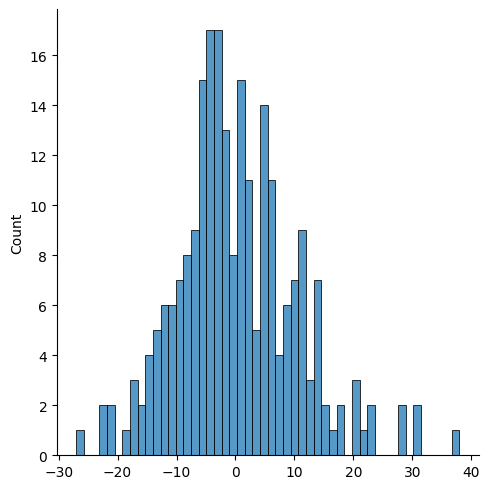

In [27]:
sns.displot((y_test-y_pred),bins=50)

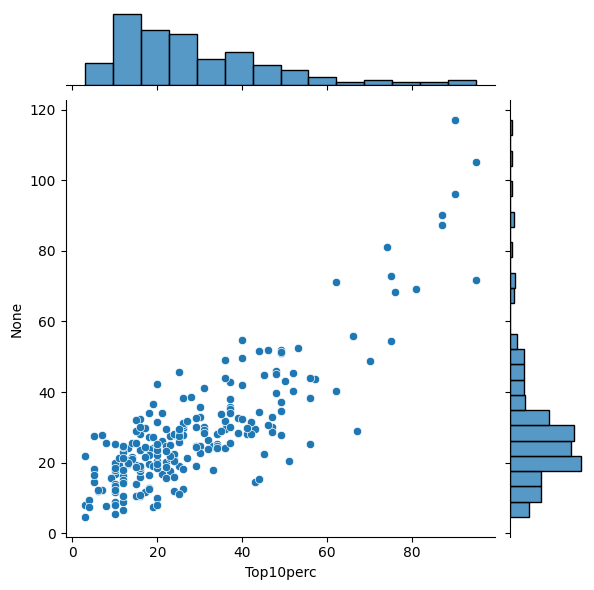

In [47]:
sns.jointplot(x=y_test,y=y_pred,kind='scatter')

Text(0.5, 1.0, 'Pred vs Test')

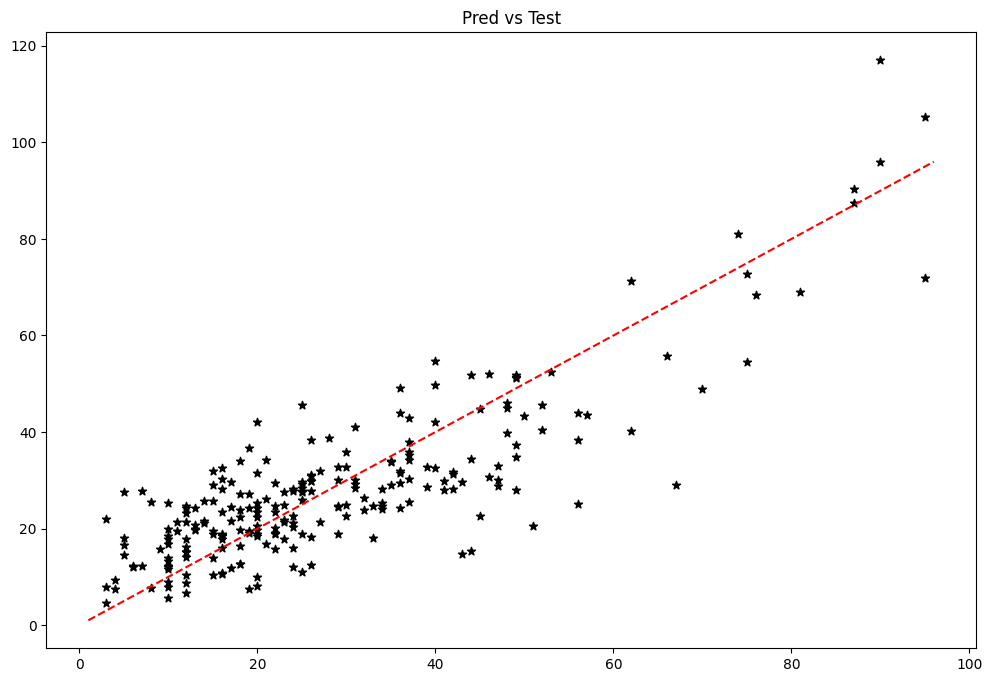

In [39]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred,color='black',marker='*')
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],color='red',linestyle='--')
plt.title('Pred vs Test')

In [40]:
from sklearn import metrics

In [43]:
print('The MAE:',metrics.mean_absolute_error(y_test,y_pred))

The MAE: 7.9377559079172375


In [45]:
print('The RMSE:',metrics.root_mean_squared_error(y_test,y_pred))

The RMSE: 10.260771736274304


In [46]:
y_pred[:5]

568    24.269295
530    16.462182
610    29.866058
109    27.569531
586    19.487833
dtype: float64